In [38]:
# Data analysis of richest people in the world

# This analysis is based on the dataset acquired as detailed below
# It is purely for educational purposes for the sake of Python, Pandas and Matplotlib
# I show different ways of extracting same information for illustration purposes
# No attempt was made to verify the dataset accuracy

# Anyone however is free to take this file and perform further analyses at his/her free will or modify the code according to CC0 licnese (details below)

In [39]:
# The file World_Billionaire_2024.csv was downloaded form Kaggle
# Link to website is listed below
# https://www.kaggle.com/datasets/divanshu22/richest-people-in-the-world-2024/data

# Thank you Kaggle and divanshu22

# License CC0 (link below)
# https://creativecommons.org/publicdomain/zero/1.0/

# Following information is pasted from above licensing link

# No Copyright
# The person who associated a work with this deed has dedicated the work to the 
# public domain by waiving all of his or her rights to the work worldwide under
# copyright law, including all related and neighboring rights, to the extent 
# allowed by law.

# You can copy, modify, distribute and perform the work, even for commercial 
# purposes, all without asking permission

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [41]:
df = pd.read_csv("World_Billionaire_2024.csv")

In [42]:
df.head(10)

,RANK,COMPANY,EXECUTIVE NAME,NET WORTH,COUNTRY
0,RANK,COMPANY,EXECUTIVE NAME,NET WORTH,COUNTRY
1,1,"Tesla, SpaceX",Elon Musk,$212.3 B,United States
2,2,Amazon,Jeff Bezos,$203.5 B,United States
3,3,LVMH,Bernard Arnault & family,$194.3 B,France
4,4,Facebook,Mark Zuckerberg,$175.9 B,United States
5,5,Oracle,Larry Ellison,$174.1 B,United States
6,6,Google,Larry Page,$145.8 B,United States
7,7,Google,Sergey Brin,$139.6 B,United States
8,8,Berkshire Hathaway,Warren Buffett,$134.8 B,United States
9,9,Microsoft,Bill Gates,$133.5 B,United States


In [43]:
df.shape

(2743, 5)

In [44]:
# Converting column headings to title case
df.columns.str.title()

Index(['Rank', 'Company', 'Executive Name', 'Net Worth', 'Country'], dtype='object')

In [45]:
# Assigning the title case names to column names
df.columns = df.columns.str.title()

In [46]:
df.head()

,Rank,Company,Executive Name,Net Worth,Country
0,RANK,COMPANY,EXECUTIVE NAME,NET WORTH,COUNTRY
1,1,"Tesla, SpaceX",Elon Musk,$212.3 B,United States
2,2,Amazon,Jeff Bezos,$203.5 B,United States
3,3,LVMH,Bernard Arnault & family,$194.3 B,France
4,4,Facebook,Mark Zuckerberg,$175.9 B,United States


In [47]:
# See data at line index 0 is repeat of column headers
# Lets remove this line

df.drop(index=0, axis=0, inplace=True)

In [48]:
# Lets check if line has been deleted
df.head()

,Rank,Company,Executive Name,Net Worth,Country
1,1,"Tesla, SpaceX",Elon Musk,$212.3 B,United States
2,2,Amazon,Jeff Bezos,$203.5 B,United States
3,3,LVMH,Bernard Arnault & family,$194.3 B,France
4,4,Facebook,Mark Zuckerberg,$175.9 B,United States
5,5,Oracle,Larry Ellison,$174.1 B,United States


In [49]:
# Checking if there is any missing values

df.isna().sum()

Rank              0
Company           3
Executive Name    0
Net Worth         0
Country           0
dtype: int64

In [50]:
# Above shows there are 3 missing values in Company column
# Checking df shape

df.shape

(2742, 5)

In [51]:
# Above shows there are 2742 rows and 5 columns in the dataset

# Company column has missing values
# Deleting those lines

df = df[df['Company'].notna()]

# notna() provides boolean series of True or False (True if value is not missing)

In [52]:
df.shape

(2739, 5)

In [53]:
# Above indicates there are now 2739 rows and 5 columns

# See the lines dropped from 2742 to 2739
# Hence three lines with missing data are deleted

df.head()

,Rank,Company,Executive Name,Net Worth,Country
1,1,"Tesla, SpaceX",Elon Musk,$212.3 B,United States
2,2,Amazon,Jeff Bezos,$203.5 B,United States
3,3,LVMH,Bernard Arnault & family,$194.3 B,France
4,4,Facebook,Mark Zuckerberg,$175.9 B,United States
5,5,Oracle,Larry Ellison,$174.1 B,United States


In [54]:
# Net Worth column has non-numeric data
# It has $ and B sign
# Removing them using

df['Net Worth'].str.replace('$','').str.replace('B','').str.strip()

# Using string replace method
# strip() removes spaces in the end so that data could be converted to numbers later

1       212.3
2       203.5
3       194.3
4       175.9
5       174.1
        ...  
2738      1.0
2739      1.0
2740      1.0
2741      0.9
2742      0.4
Name: Net Worth, Length: 2739, dtype: object

In [55]:
# Saving the extracted clean data back to same column
df['Net Worth'] = df['Net Worth'].str.replace('$','').str.replace('B','').str.strip()

In [56]:
# Checking if repalcement was successfull

df.head()

,Rank,Company,Executive Name,Net Worth,Country
1,1,"Tesla, SpaceX",Elon Musk,212.3,United States
2,2,Amazon,Jeff Bezos,203.5,United States
3,3,LVMH,Bernard Arnault & family,194.3,France
4,4,Facebook,Mark Zuckerberg,175.9,United States
5,5,Oracle,Larry Ellison,174.1,United States


In [57]:
# Yes it was

df.dtypes

Rank              object
Company           object
Executive Name    object
Net Worth         object
Country           object
dtype: object

In [58]:
# "Net Worth" column is not a number
# Converting to number

df['Net Worth'].apply(lambda x: float(x))

#lambda function applies float(x) to each value

1       212.3
2       203.5
3       194.3
4       175.9
5       174.1
        ...  
2738      1.0
2739      1.0
2740      1.0
2741      0.9
2742      0.4
Name: Net Worth, Length: 2739, dtype: float64

In [59]:
# Saving in the same column

df['Net Worth']=df['Net Worth'].apply(lambda x: float(x))

In [60]:
df.head()

,Rank,Company,Executive Name,Net Worth,Country
1,1,"Tesla, SpaceX",Elon Musk,212.3,United States
2,2,Amazon,Jeff Bezos,203.5,United States
3,3,LVMH,Bernard Arnault & family,194.3,France
4,4,Facebook,Mark Zuckerberg,175.9,United States
5,5,Oracle,Larry Ellison,174.1,United States


In [61]:
df.dtypes

Rank               object
Company            object
Executive Name     object
Net Worth         float64
Country            object
dtype: object

In [62]:
# Finally the column is clean and Net Worth column is float

In [63]:
df.head()

,Rank,Company,Executive Name,Net Worth,Country
1,1,"Tesla, SpaceX",Elon Musk,212.3,United States
2,2,Amazon,Jeff Bezos,203.5,United States
3,3,LVMH,Bernard Arnault & family,194.3,France
4,4,Facebook,Mark Zuckerberg,175.9,United States
5,5,Oracle,Larry Ellison,174.1,United States


In [64]:
# Above shows that index and Rank columns show same data
# But Rank column is object, not a number

In [65]:
# Removing Rank column

df.pop('Rank')

1          1
2          2
3          3
4          4
5          5
        ... 
2738    2738
2739    2739
2740    2740
2741    2741
2742    2742
Name: Rank, Length: 2739, dtype: object

In [66]:
df.head()

,Company,Executive Name,Net Worth,Country
1,"Tesla, SpaceX",Elon Musk,212.3,United States
2,Amazon,Jeff Bezos,203.5,United States
3,LVMH,Bernard Arnault & family,194.3,France
4,Facebook,Mark Zuckerberg,175.9,United States
5,Oracle,Larry Ellison,174.1,United States


In [67]:
df.index

Index([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
       ...
       2733, 2734, 2735, 2736, 2737, 2738, 2739, 2740, 2741, 2742],
      dtype='int64', length=2739)

In [68]:
# Index is not range index
# Modifying to range index type

df.reset_index(drop=True, inplace=True)

In [69]:
df.index

RangeIndex(start=0, stop=2739, step=1)

In [70]:
# Now index is true range index

df.head()

,Company,Executive Name,Net Worth,Country
0,"Tesla, SpaceX",Elon Musk,212.3,United States
1,Amazon,Jeff Bezos,203.5,United States
2,LVMH,Bernard Arnault & family,194.3,France
3,Facebook,Mark Zuckerberg,175.9,United States
4,Oracle,Larry Ellison,174.1,United States


In [71]:
# Now data set is clean and ready for analysis

In [72]:
# Find the least wealthy person

df['Net Worth'].nsmallest(1)

# This gives out the smallest net worth index and value

2738    0.4
Name: Net Worth, dtype: float64

In [73]:
# Extracting the index
df['Net Worth'].nsmallest(1).index[0]

2738

In [74]:
# USing index to extract data of least wealthy person

df.loc[df['Net Worth'].nsmallest(1).index[0]]

Company           music, sneakers
Executive Name         Kanye West
Net Worth                     0.4
Country             United States
Name: 2738, dtype: object

In [75]:
# Another way to check if 0.4 is indeed the lowest net worth
# Sorting net worth values in ascending order
# And seeing the first value

df['Net Worth'].sort_values()

2738      0.4
2737      0.9
2735      1.0
2676      1.0
2677      1.0
        ...  
4       174.1
3       175.9
2       194.3
1       203.5
0       212.3
Name: Net Worth, Length: 2739, dtype: float64

In [76]:
# Another simple was to extract same informaton is below

df.sort_values(by='Net Worth', ascending=True).iloc[0]

Company           music, sneakers
Executive Name         Kanye West
Net Worth                     0.4
Country             United States
Name: 2738, dtype: object

In [77]:
df.head()

,Company,Executive Name,Net Worth,Country
0,"Tesla, SpaceX",Elon Musk,212.3,United States
1,Amazon,Jeff Bezos,203.5,United States
2,LVMH,Bernard Arnault & family,194.3,France
3,Facebook,Mark Zuckerberg,175.9,United States
4,Oracle,Larry Ellison,174.1,United States


In [78]:
# See the list of courntries

df.Country.unique().tolist()

['United States',
 'France',
 'Spain',
 'India',
 'Mexico',
 'Canada',
 'Indonesia',
 'China',
 'Italy',
 'Germany',
 'Austria',
 'Japan',
 'Switzerland',
 'Hong Kong',
 'Australia',
 'Russia',
 'Chile',
 'Cyprus',
 'Brazil',
 'Israel',
 'Sweden',
 'United Kingdom',
 'Czech Republic',
 'United Arab Emirates',
 'Singapore',
 'Netherlands',
 'Nigeria',
 'Taiwan',
 'Thailand',
 'Denmark',
 'Malaysia',
 'Colombia',
 'South Africa',
 'Philippines',
 'South Korea',
 'New Zealand',
 'Ireland',
 'Egypt',
 'Belgium',
 'Norway',
 'Eswatini (Swaziland)',
 'Poland',
 'Argentina',
 'Greece',
 'Portugal',
 'Kazakhstan',
 'Monaco',
 'Georgia',
 'Turkey',
 'Belize',
 'Venezuela',
 'Finland',
 'Vietnam',
 'Ukraine',
 'Oman',
 'Lebanon',
 'Guernsey',
 'Algeria',
 'Romania',
 'Bulgaria',
 'Iceland',
 'Qatar',
 'Nepal',
 'Zimbabwe',
 'Tanzania',
 'Slovakia',
 'Croatia',
 'Hungary',
 'Morocco',
 'Estonia',
 'Liechtenstein',
 'Barbados',
 'St. Kitts and Nevis',
 'Peru',
 'Armenia',
 'Panama',
 'Bangladesh',

In [79]:
# Find all wealthy people in France who are over 10 Billion in net worth

c = df.Country == 'France'
nw = df['Net Worth'] > 10
df[c & nw]

,Company,Executive Name,Net Worth,Country
2,LVMH,Bernard Arnault & family,194.3,France
15,L'Oréal,Francoise Bettencourt Meyers & family,96.3,France
36,Chanel,Alain Wertheimer,38.6,France
37,Chanel,Gerard Wertheimer,38.6,France
70,Luxury goods,François Pinault & family,25.5,France
76,Cheese,Emmanuel Besnier,24.5,France
135,Hermes,Nicolas Puech,14.4,France
223,"Internet, telecom",Xavier Niel,10.1,France


In [80]:
# Find the wealthiest person in each country

df.head()

,Company,Executive Name,Net Worth,Country
0,"Tesla, SpaceX",Elon Musk,212.3,United States
1,Amazon,Jeff Bezos,203.5,United States
2,LVMH,Bernard Arnault & family,194.3,France
3,Facebook,Mark Zuckerberg,175.9,United States
4,Oracle,Larry Ellison,174.1,United States


In [81]:
df.groupby('Country').max()

,Company,Executive Name,Net Worth
Country,,,
Algeria,Food,Issad Rebrab & family,2.5
Argentina,Real estate,Marcos Galperin,6.5
Armenia,Investment banking,Ruben Vardanyan & family,1.1
Australia,Toys,Vivek Chaand Sehgal,30.8
Austria,Sports,Wolfgang Leitner,38.8
...,...,...,...
United Kingdom,textiles,Will Adderley,18.0
United States,used cars,Zachary Stern,212.3
Venezuela,Banking,Juan Carlos Escotet,4.4


In [82]:
# The wealthiest people in the world come from which top 5 businesses

df.Company.value_counts().nlargest(5)

Company
Real estate        144
Diversified         95
Investments         91
Pharmaceuticals     82
Software            57
Name: count, dtype: int64

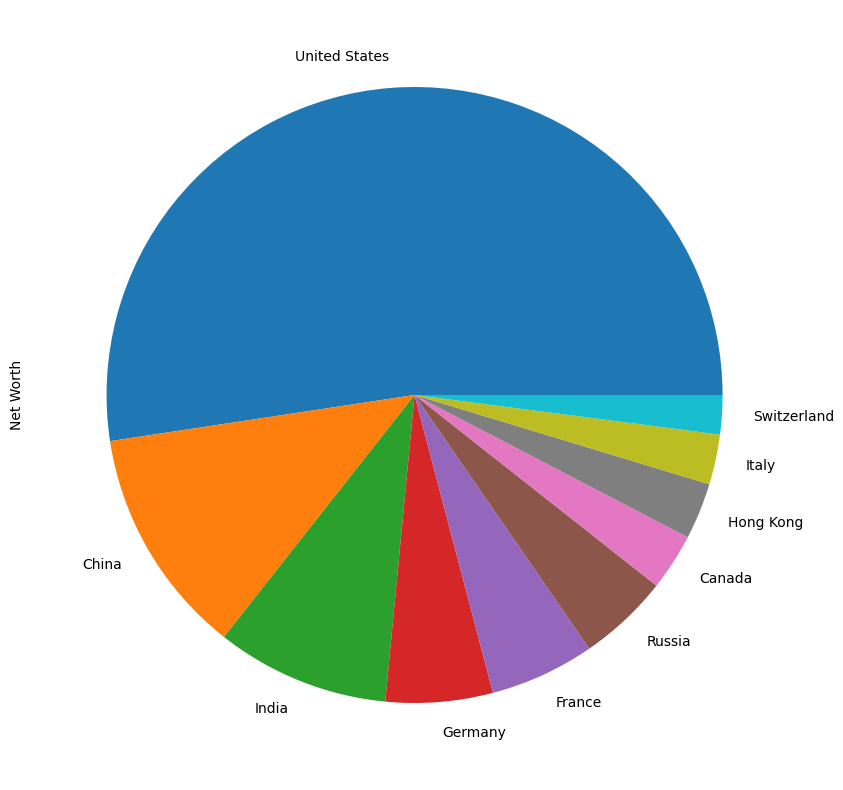

In [83]:
# Sum total wealth in each country
# Then find the top 10 wealthiest countries
# And plot pie chart showing their relative wealth

df.groupby('Country')['Net Worth'].sum().nlargest(10).plot(kind='pie', figsize=(10,10));

In [84]:
df.head()

,Company,Executive Name,Net Worth,Country
0,"Tesla, SpaceX",Elon Musk,212.3,United States
1,Amazon,Jeff Bezos,203.5,United States
2,LVMH,Bernard Arnault & family,194.3,France
3,Facebook,Mark Zuckerberg,175.9,United States
4,Oracle,Larry Ellison,174.1,United States


In [85]:
# How many individuals have net worth less than or equal to 1 Billion

df['Net Worth'].le(1).sum()
# This counts all the True values as 1, sum of all True is number of people

84

In [86]:
# Who are those individuals

names_1billion = (df[df['Net Worth'].le(1)])['Executive Name'].tolist()

In [87]:
names_1billion

['Lisa Su',
 'Maria Frias',
 'Clelia Haji-Ioannou',
 'Lucio Co',
 'Tseng Sing-ai',
 'Yao Hsiao Tung',
 'Tang Jinkui & family',
 'Zhao Hongfei',
 'Andy Fang',
 'Tibor Veres',
 'Jet Jie Li',
 'Luigi Cremonini & family',
 'Igor Kudryashkin',
 'Sergey Shishkarev',
 'Victor Fung',
 'Surendra Hiranandani',
 'Ric Elias',
 'Zeng Chaolin',
 'Dirk Stroeer',
 'Michelle Zatlyn',
 'Huang Qiaoling',
 'John Oyler',
 'Kim Jae-young',
 'Thongma Vijitpongpun',
 'Eiichi Kuriwada',
 'Lee Seung-gun',
 'Tianqiao Chen',
 'Danilo Iervolino',
 'Itamar Locks & family',
 'Blairo Maggi',
 'Chen Shiliang',
 'David Fattal & family',
 'Dou Zhenggang',
 'Xu Xudong & family',
 'Andrei Kuzyaev',
 'Cai Hongbin',
 'Hedda im Brahm-Droege',
 'Koo Bon-sik',
 'Zhu Yiming',
 'Robert Knauf',
 'Martin Knauf',
 'Clóvis Ermírio de Moraes',
 'Regina Helena S. Velloso',
 'Carlos Eduardo M. Scripilliti',
 'Tadako Nakatani',
 'Joao Alves de Queiroz Filho',
 'Yang Tingdong',
 'Lu Zhongfang',
 'Edouard Carmignac',
 'Niti Osathanugrah',

In [88]:
# Output their full details

df[df['Net Worth'].le(1)]

,Company,Executive Name,Net Worth,Country
2655,Semiconductors,Lisa Su,1.0,United States
2656,Media,Maria Frias,1.0,Brazil
2657,EasyJet,Clelia Haji-Ioannou,1.0,Cyprus
2658,Retail,Lucio Co,1.0,Philippines
2659,Petrochemicals,Tseng Sing-ai,1.0,Taiwan
...,...,...,...,...
2734,Machinery,Song Fei,1.0,China
2735,Packaging,Li Xiaohua & family,1.0,China
2736,Electric scooters,Qian Jinghong,1.0,China
2737,Lithium-ion battery cap,Li Jianli,0.9,China


In [89]:
# Which industry has produced least number of billionnaires and where

df['Net Worth'].nsmallest(1)

2738    0.4
Name: Net Worth, dtype: float64

In [90]:
df['Net Worth'].nsmallest(1).iloc[0]

0.4

In [91]:
df[df['Net Worth'] == df['Net Worth'].nsmallest(1).iloc[0]]

,Company,Executive Name,Net Worth,Country
2738,"music, sneakers",Kanye West,0.4,United States


In [92]:
# Another simplet way is this

df.sort_values(by='Net Worth', ascending=True)
# See the first row below

,Company,Executive Name,Net Worth,Country
2738,"music, sneakers",Kanye West,0.4,United States
2737,Lithium-ion battery cap,Li Jianli,0.9,China
2735,Packaging,Li Xiaohua & family,1.0,China
2676,Biotech,John Oyler,1.0,United States
2677,Online games,Kim Jae-young,1.0,South Korea
...,...,...,...,...
4,Oracle,Larry Ellison,174.1,United States
3,Facebook,Mark Zuckerberg,175.9,United States
2,LVMH,Bernard Arnault & family,194.3,France
1,Amazon,Jeff Bezos,203.5,United States


In [93]:
# Which individuals have net worth above 100 B and are not from US
df.head()

,Company,Executive Name,Net Worth,Country
0,"Tesla, SpaceX",Elon Musk,212.3,United States
1,Amazon,Jeff Bezos,203.5,United States
2,LVMH,Bernard Arnault & family,194.3,France
3,Facebook,Mark Zuckerberg,175.9,United States
4,Oracle,Larry Ellison,174.1,United States


In [94]:
us = df.Country == 'United States'
# Produces boolean values for country

In [95]:
b100 = df['Net Worth'] > 100
# Produces boolean values for worth

In [96]:
df[b100 & ~us]

,Company,Executive Name,Net Worth,Country
2,LVMH,Bernard Arnault & family,194.3,France
10,Zara,Amancio Ortega,114.8,Spain
11,Diversified,Mukesh Ambani,114.8,India


In [97]:
# What percentage of billionnaires of the world are from US

total = df.shape[0]

In [98]:
total

2739

In [99]:
from_us = df[df.Country == 'United States'].shape[0]

In [100]:
from_us

800

In [101]:
(from_us/total)*100

29.207740051113547

In [102]:
# List top 10 billionnairs

df.sort_values(by='Net Worth', ascending=False).iloc[0:10,]

,Company,Executive Name,Net Worth,Country
0,"Tesla, SpaceX",Elon Musk,212.3,United States
1,Amazon,Jeff Bezos,203.5,United States
2,LVMH,Bernard Arnault & family,194.3,France
3,Facebook,Mark Zuckerberg,175.9,United States
4,Oracle,Larry Ellison,174.1,United States
5,Google,Larry Page,145.8,United States
6,Google,Sergey Brin,139.6,United States
7,Berkshire Hathaway,Warren Buffett,134.8,United States
8,Microsoft,Bill Gates,133.5,United States
9,Microsoft,Steve Ballmer,130.4,United States


In [103]:
# List all Australian billionnairs

df.groupby('Country').get_group('Australia')

,Company,Executive Name,Net Worth,Country
52,Mining,Gina Rinehart,30.8,Australia
112,Real estate,Harry Triguboff,16.5,Australia
113,Mining,Andrew Forrest & family,16.5,Australia
201,Software,Mike Cannon-Brookes,10.7,Australia
211,Manufacturing,Anthony Pratt,10.4,Australia
212,Software,Scott Farquhar,10.4,Australia
337,Software,Richard White,7.9,Australia
350,Auto parts,Vivek Chaand Sehgal,7.7,Australia
445,Investments,Frank Lowy,6.5,Australia
503,"Construction equipment, media",Kerry Stokes,6.0,Australia


In [104]:
# List all Malaysian billionnairs
# Draw their bar chart

df.groupby('Country').get_group('Malaysia')

,Company,Executive Name,Net Worth,Country
173,"Palm oil, shipping, property",Robert Kuok,11.8,Malaysia
286,"Banking, property",Quek Leng Chan,8.8,Malaysia
639,"Telecoms, media, oil-services",Ananda Krishnan,4.9,Malaysia
721,Aluminum,Koon Poh Keong,4.4,Malaysia
1137,"Palm oil, property",Lee Yeow Chor,3.0,Malaysia
1293,"Property, healthcare",Jeffrey Cheah,2.6,Malaysia
1428,"Palm oil, property",Lee Yeow Seng,2.3,Malaysia
1478,Casinos,Lim Kok Thay,2.2,Malaysia
1675,Investments,Kie Chie Wong,2.0,Malaysia
2124,"Palm oil, property",Lau Cho Kun,1.5,Malaysia


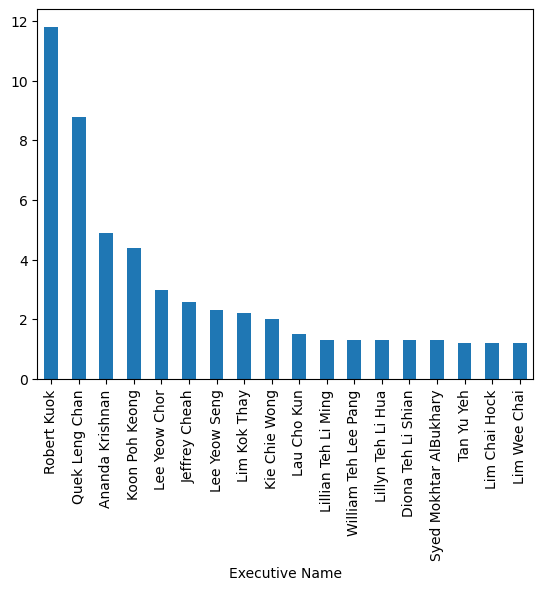

In [105]:
df.groupby('Country').get_group('Malaysia').set_index('Executive Name')['Net Worth'].plot(kind='bar');

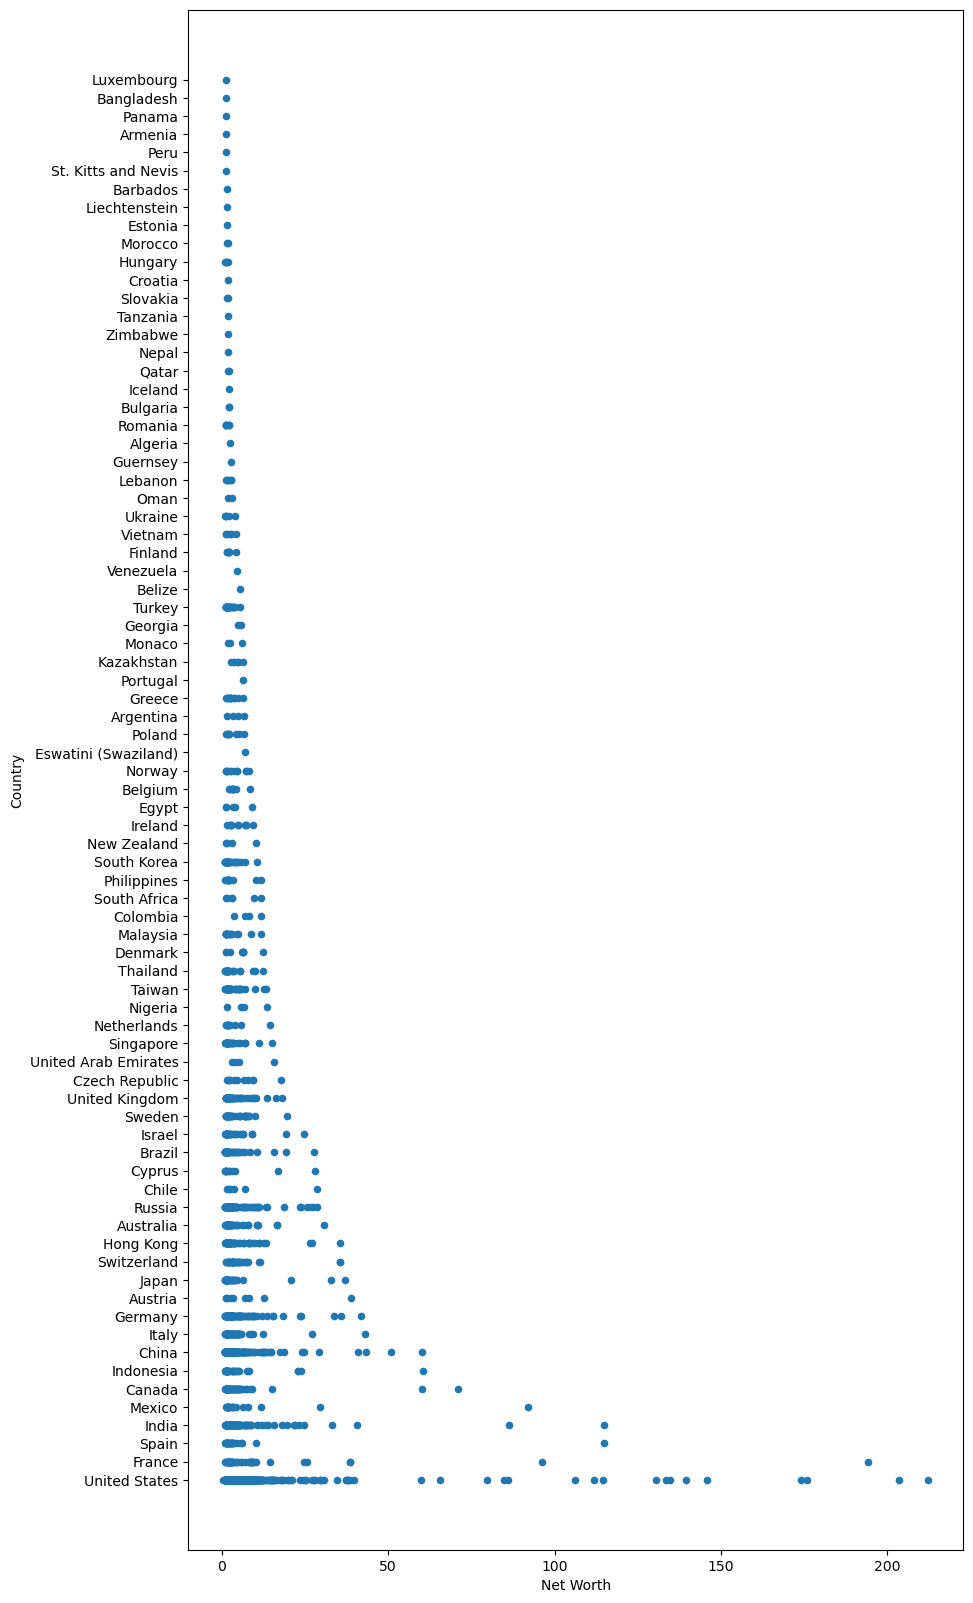

In [106]:
# Show distribution of worldwide wealth in a scatter plot

df.plot(kind='scatter',x='Net Worth',y='Country',figsize=(10,20));

In [107]:
# End of file